In [18]:
import numpy as np
from surprise import Dataset, Reader
from surprise import SVDpp, SVD, NMF
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from surprise import accuracy


data = Dataset.load_builtin('ml-100k')
data

In [20]:
# Виконайте 5-кратну перехресну перевірку SVD і роздрукуйте результати.
cvd_results = cross_validate(SVD(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print("Mean RMSE: {:.4f}".format(np.mean(cvd_results['test_rmse'])))
print("Mean MAE: {:.4f}".format(np.mean(cvd_results['test_mae'])))
print("Mean fit time: {:.4f}".format(np.mean(cvd_results['fit_time'])))
print("Mean test time: {:.4f}".format(np.mean(cvd_results['test_time'])))

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9410  0.9328  0.9341  0.9302  0.9442  0.9365  0.0053  
MAE (testset)     0.7411  0.7359  0.7361  0.7348  0.7424  0.7380  0.0031  
Fit time          3.21    1.69    1.73    1.69    1.70    2.01    0.60    
Test time         0.41    0.39    0.24    0.36    0.26    0.33    0.07    
Mean RMSE: 0.9365
Mean MAE: 0.7380
Mean fit time: 2.0063
Mean test time: 0.3319


In [22]:
# Запустіть 5-кратну перехресну перевірку SVDpp і роздрукуйте результати.
cvdpp_results = cross_validate(SVDpp(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print("Mean RMSE: {:.4f}".format(np.mean(cvdpp_results['test_rmse'])))
print("Mean MAE: {:.4f}".format(np.mean(cvdpp_results['test_mae'])))
print("Mean fit time: {:.4f}".format(np.mean(cvdpp_results['fit_time'])))
print("Mean test time: {:.4f}".format(np.mean(cvdpp_results['test_time'])))

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9175  0.9222  0.9168  0.9151  0.9237  0.9191  0.0033  
MAE (testset)     0.7200  0.7212  0.7186  0.7179  0.7231  0.7202  0.0019  
Fit time          79.35   77.68   78.04   78.07   79.49   78.53   0.74    
Test time         7.43    7.52    7.37    7.37    7.97    7.53    0.22    
Mean RMSE: 0.9191
Mean MAE: 0.7202
Mean fit time: 78.5280
Mean test time: 7.5324


In [21]:
# Запустіть 5-кратну перехресну перевірку NMF і роздрукуйте результати.
nmf_results = cross_validate(NMF(), data, measures=['rmse', 'mae'], cv=5, verbose=True)

print("Mean RMSE: {:.4f}".format(np.mean(nmf_results['test_rmse'])))
print("Mean MAE: {:.4f}".format(np.mean(nmf_results['test_mae'])))
print("Mean fit time: {:.4f}".format(np.mean(nmf_results['fit_time'])))
print("Mean test time: {:.4f}".format(np.mean(nmf_results['test_time'])))

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9657  0.9635  0.9569  0.9727  0.9676  0.9653  0.0052  
MAE (testset)     0.7571  0.7599  0.7535  0.7627  0.7604  0.7587  0.0032  
Fit time          4.38    2.89    2.97    2.97    2.89    3.22    0.58    
Test time         0.33    0.20    0.33    0.22    0.34    0.29    0.06    
Mean RMSE: 0.9653
Mean MAE: 0.7587
Mean fit time: 3.2217
Mean test time: 0.2852


In [23]:
rmse_results = {
    'SVD': np.mean(cvd_results['test_rmse']),
    'SVD++': np.mean(cvdpp_results['test_rmse']),
    'NMF': np.mean(nmf_results['test_rmse'])
}

# Визначення алгоритму з найменшим RMSE
best_algorithm = min(rmse_results, key=rmse_results.get)

print(f"Найкращий алгоритм: {best_algorithm} з RMSE = {rmse_results[best_algorithm]:.4f}")

Найкращий алгоритм: SVD++ з RMSE = 0.9191


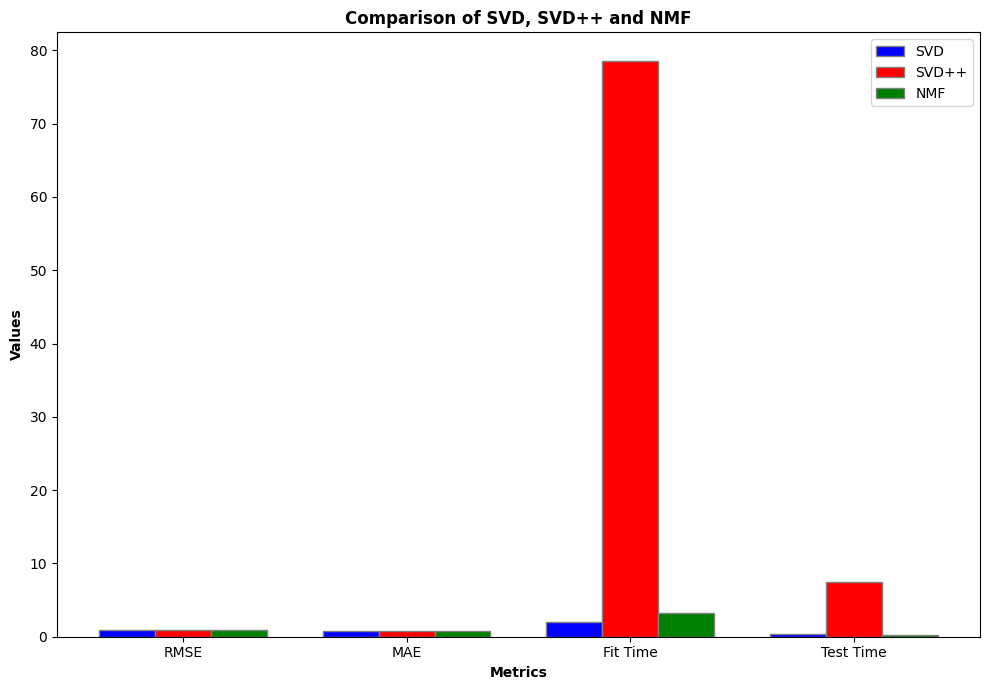

In [24]:
import matplotlib.pyplot as plt

metrics = ['RMSE', 'MAE', 'Fit Time', 'Test Time']
values_svd = [np.mean(cvd_results['test_rmse']),
              np.mean(cvd_results['test_mae']),
              np.mean(cvd_results['fit_time']),
              np.mean(cvd_results['test_time'])]

values_svdpp = [np.mean(cvdpp_results['test_rmse']),
                np.mean(cvdpp_results['test_mae']),
                np.mean(cvdpp_results['fit_time']),
                np.mean(cvdpp_results['test_time'])]

values_nmf = [np.mean(nmf_results['test_rmse']),
              np.mean(nmf_results['test_mae']),
              np.mean(nmf_results['fit_time']),
              np.mean(nmf_results['test_time'])]

bar_width = 0.25
r1 = np.arange(len(values_svd))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10,7))
plt.bar(r1, values_svd, width=bar_width, color='blue', edgecolor='grey', label='SVD')
plt.bar(r2, values_svdpp, width=bar_width, color='red', edgecolor='grey', label='SVD++')
plt.bar(r3, values_nmf, width=bar_width, color='green', edgecolor='grey', label='NMF')

plt.title('Comparison of SVD, SVD++ and NMF', fontweight='bold')
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(values_svd))], metrics)
plt.legend()

plt.tight_layout()
plt.show()